In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from functools import reduce
# 한글폰트 사용을 위해 설치

import koreanize_matplotlib

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from matplotlib import rc
rc('font', family ='AppleGothic')

pd.set_option('display.max_columns', None) # 모든 열 출력

# 데이터 불러오기

In [2]:
# 데이터 불러오기 
# 가격
df1 = pd.read_excel('망간+가격(202106~202406).xls',header = 9,usecols = ['기준일','기준가격','등락가','등락비율','재고량'])
# 광물종합지수
df2 = pd.read_excel('광물종합지수(202106~202406).xls', header =3, sheet_name = 0)
df3 = pd.read_excel('광물종합지수(202106~202406).xls', header =3, sheet_name = 1)
df4 = pd.read_excel('광물종합지수(202106~202406).xls', header =3, sheet_name = 2)
# 시장전망지수
df5 = pd.read_excel('망간 시장전망지표(202106~202406).xls', header =2)
# 수급안정화지수
df6 = pd.read_excel('망간 수급안정화지수(202106~202406).xls', header =2)
# 에너지광물지수
df7 = pd.read_csv('053.한국광해광업공단_파생지수_에너지광물지수_20240520.csv', encoding = 'cp949')
# 코발트 수출입
df8 = pd.read_csv('망간_수출입.csv')
df9 = pd.read_csv('환율.csv')

# 전처리

In [3]:
dfs = [df2, df3, df4, df5, df6]
for df in dfs:
    df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
def change_date(df) :
    # '기준일' 열을 datetime 형식으로 변환
    df['기준일'] = pd.to_datetime(df['기준일'], format='%Y%m%d')

    # '기준일' 열을 'YYYY-MM-DD' 형식의 문자열로 변환
    df['기준일'] = df['기준일'].dt.strftime('%Y-%m-%d')
change_date(df2)
change_date(df3)
change_date(df4)

In [5]:
dfs = [df1, df2, df3, df4, df7]
for df in dfs:
    # '기준일' 열을 날짜(datetime) 형식으로 변환
    df['기준일'] = pd.to_datetime(df['기준일'])

    # '기준일'을 인덱스로 설정
    df.set_index('기준일', inplace=True)

In [6]:
# 재고량 값 전부 0 삭제
df1.drop(['재고량'], axis =1, inplace =True)

In [7]:
df2['광물종합지수'] = df2['광물종합지수'].str.replace(',', '').astype(float)

df3['메이저금속지수'] = df3['메이저금속지수'].str.replace(',', '').astype(float)

df4['희유금속지수'] = df4['희유금속지수'].str.replace(',', '').astype(float)

In [8]:
df7 = df7[-769:].copy()

In [9]:
df9 = df9[49:].copy()

df9.rename(columns = {'Date':'기준일'}, inplace= True)
df9['기준일'] = pd.to_datetime(df9['기준일'])
df9.set_index('기준일', inplace=True)

In [10]:
# 망간 가격데이터는 주간
df1.reset_index(inplace = True)
df1.rename(columns={'기준일': 'Week'}, inplace =True)

In [11]:
df1

,Week,기준가격,등락가,등락비율
0,2021-06-11,1445,40,2.85
1,2021-06-18,1445,0,0.00
2,2021-06-25,1445,0,0.00
3,2021-07-02,1445,0,0.00
4,2021-07-09,1445,0,0.00
...,...,...,...,...
152,2024-05-10,1280,30,2.40
153,2024-05-17,1350,70,5.47
154,2024-05-24,1350,0,0.00
155,2024-05-31,1360,10,0.74


In [12]:
# 데이터프레임 리스트
dfs = [df2, df3, df4, df7, df9]

# 여러 데이터프레임 병합 (기준일 기준 outer join)
df_merged1 = reduce(lambda left, right: pd.merge(left, right, on='기준일', how='outer'), dfs)
df = df_merged1[['광물종합지수','메이저금속지수','희유금속지수','에너지광물지수','Close']].copy()
df.reset_index(inplace = True)

In [13]:
df['Week'] = df['기준일'].dt.to_period('W').apply(lambda r: r.start_time)

In [14]:
df['Week'] = df['Week'] + pd.DateOffset(days=4)
df

,기준일,광물종합지수,메이저금속지수,희유금속지수,에너지광물지수,Close,Week
0,2021-06-09,2407.51,2494.11,1682.47,2193.115993,1116.890015,2021-06-11
1,2021-06-10,2436.46,2523.49,1682.47,2227.469874,1116.410034,2021-06-11
2,2021-06-11,2452.92,2519.40,1682.47,2284.482995,1111.260010,2021-06-11
3,2021-06-14,2498.37,2567.59,1741.94,2315.536776,1115.550049,2021-06-18
4,2021-06-15,2496.55,2564.67,1741.94,2315.536776,1116.319946,2021-06-18
...,...,...,...,...,...,...,...
782,2024-06-07,2835.86,2513.88,1815.23,NaN,1365.250000,2024-06-07
783,2024-06-10,NaN,NaN,NaN,NaN,1379.050049,2024-06-14
784,2024-06-11,NaN,NaN,NaN,NaN,1373.959961,2024-06-14
785,2024-06-12,NaN,NaN,NaN,NaN,1377.359985,2024-06-14


In [15]:
merged_df = pd.merge(df, df1, how='outer', on='Week', suffixes=('_daily', '_weekly'))

# 'Date'를 기준으로 정렬
merged_df = merged_df.sort_values(by='기준일')
merged_df

,기준일,광물종합지수,메이저금속지수,희유금속지수,에너지광물지수,Close,Week,기준가격,등락가,등락비율
0,2021-06-09,2407.51,2494.11,1682.47,2193.115993,1116.890015,2021-06-11,1445.0,40.0,2.85
1,2021-06-10,2436.46,2523.49,1682.47,2227.469874,1116.410034,2021-06-11,1445.0,40.0,2.85
2,2021-06-11,2452.92,2519.40,1682.47,2284.482995,1111.260010,2021-06-11,1445.0,40.0,2.85
3,2021-06-14,2498.37,2567.59,1741.94,2315.536776,1115.550049,2021-06-18,1445.0,0.0,0.00
4,2021-06-15,2496.55,2564.67,1741.94,2315.536776,1116.319946,2021-06-18,1445.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
782,2024-06-07,2835.86,2513.88,1815.23,NaN,1365.250000,2024-06-07,1440.0,80.0,5.88
783,2024-06-10,NaN,NaN,NaN,NaN,1379.050049,2024-06-14,NaN,NaN,NaN
784,2024-06-11,NaN,NaN,NaN,NaN,1373.959961,2024-06-14,NaN,NaN,NaN
785,2024-06-12,NaN,NaN,NaN,NaN,1377.359985,2024-06-14,NaN,NaN,NaN


In [16]:
df1 = merged_df.drop(['Week','등락가','등락비율'], axis =1).copy()

In [17]:
# df1의 날짜를 연-월로 변환
df1['Month'] = df1['기준일'].dt.to_period('M').dt.to_timestamp()
df1

,기준일,광물종합지수,메이저금속지수,희유금속지수,에너지광물지수,Close,기준가격,Month
0,2021-06-09,2407.51,2494.11,1682.47,2193.115993,1116.890015,1445.0,2021-06-01
1,2021-06-10,2436.46,2523.49,1682.47,2227.469874,1116.410034,1445.0,2021-06-01
2,2021-06-11,2452.92,2519.40,1682.47,2284.482995,1111.260010,1445.0,2021-06-01
3,2021-06-14,2498.37,2567.59,1741.94,2315.536776,1115.550049,1445.0,2021-06-01
4,2021-06-15,2496.55,2564.67,1741.94,2315.536776,1116.319946,1445.0,2021-06-01
...,...,...,...,...,...,...,...,...
782,2024-06-07,2835.86,2513.88,1815.23,NaN,1365.250000,1440.0,2024-06-01
783,2024-06-10,NaN,NaN,NaN,NaN,1379.050049,NaN,2024-06-01
784,2024-06-11,NaN,NaN,NaN,NaN,1373.959961,NaN,2024-06-01
785,2024-06-12,NaN,NaN,NaN,NaN,1377.359985,NaN,2024-06-01


In [18]:
df5['기준일'] = pd.to_datetime(df5['기준일'], format='%Y-%m-%d')
# '기준일'을 인덱스로 설정
df5.set_index('기준일', inplace=True)

df5 = df5[-36:].copy()

In [19]:
df6['기준일'] = pd.to_datetime(df6['기준일'], format='%Y%m')
# '기준일'을 인덱스로 설정
df6.set_index('기준일', inplace=True)

df6 = df6[-37:].copy()

In [21]:
df8.drop(['HS코드','품목명'], axis =1, inplace=True)
df8.rename(columns={'기간': '기준일'}, inplace =True)

df8 = df8[1:].copy()
df8['기준일'] = pd.to_datetime(df8['기준일'], format='%Y-%m')

# '기준일'을 인덱스로 설정
df8.set_index('기준일', inplace=True)

In [22]:
# 데이터프레임 리스트
dfs = [df5, df6, df8]

# 여러 데이터프레임 병합 (기준일 기준 outer join)
df_merged = reduce(lambda left, right: pd.merge(left, right, on='기준일', how='outer'), dfs)
df_merged = df_merged.sort_values(by='기준일')

df2 =df_merged[['시장전망지표','수급안정화지수','수출 중량','수출 금액','수입 중량','수입 금액','무역수지']].copy()

df2.reset_index(inplace = True)

df2.rename(columns={'기준일': 'Month'}, inplace =True)

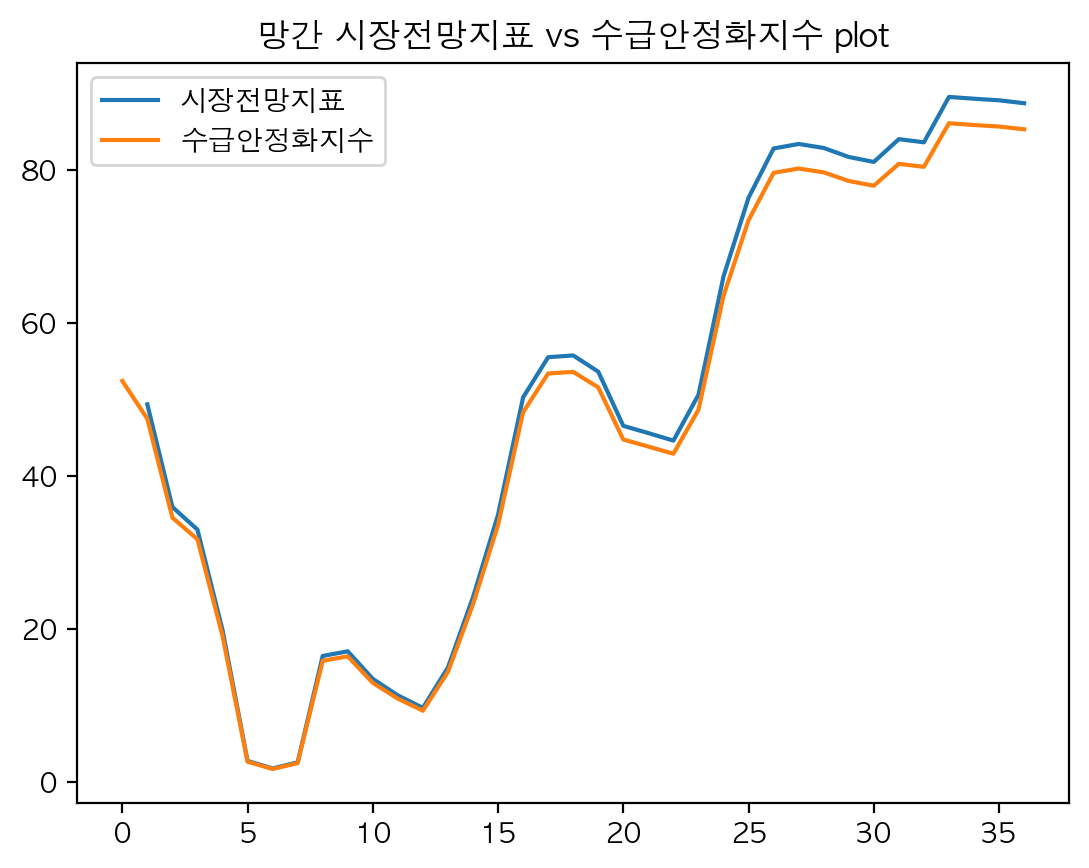

In [23]:
df2[['시장전망지표','수급안정화지수']].plot()
plt.title('망간 시장전망지표 vs 수급안정화지수 plot')
plt.show()

In [24]:
merged_df = pd.merge(df1, df2, how='outer', on='Month', suffixes=('_daily', '_monthly'))

In [25]:
merged_df.sort_values(by='기준일', inplace = True)
merged_df.drop(['Month'], axis =1, inplace = True)
data = merged_df.copy()
data

,기준일,광물종합지수,메이저금속지수,희유금속지수,에너지광물지수,Close,기준가격,시장전망지표,수급안정화지수,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2021-06-09,2407.51,2494.11,1682.47,2193.115993,1116.890015,1445.0,49.37,47.48,0.3,15.0,7806.1,19856.0,-19841.0
1,2021-06-10,2436.46,2523.49,1682.47,2227.469874,1116.410034,1445.0,49.37,47.48,0.3,15.0,7806.1,19856.0,-19841.0
2,2021-06-11,2452.92,2519.40,1682.47,2284.482995,1111.260010,1445.0,49.37,47.48,0.3,15.0,7806.1,19856.0,-19841.0
3,2021-06-14,2498.37,2567.59,1741.94,2315.536776,1115.550049,1445.0,49.37,47.48,0.3,15.0,7806.1,19856.0,-19841.0
4,2021-06-15,2496.55,2564.67,1741.94,2315.536776,1116.319946,1445.0,49.37,47.48,0.3,15.0,7806.1,19856.0,-19841.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,2024-06-10,NaN,NaN,NaN,NaN,1379.050049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
784,2024-06-11,NaN,NaN,NaN,NaN,1373.959961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
785,2024-06-12,NaN,NaN,NaN,NaN,1377.359985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
786,2024-06-13,NaN,NaN,NaN,NaN,1376.020020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data = data.dropna()
data

,기준일,광물종합지수,메이저금속지수,희유금속지수,에너지광물지수,Close,기준가격,시장전망지표,수급안정화지수,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2021-06-09,2407.51,2494.11,1682.47,2193.115993,1116.890015,1445.0,49.37,47.48,0.3,15.0,7806.1,19856.0,-19841.0
1,2021-06-10,2436.46,2523.49,1682.47,2227.469874,1116.410034,1445.0,49.37,47.48,0.3,15.0,7806.1,19856.0,-19841.0
2,2021-06-11,2452.92,2519.40,1682.47,2284.482995,1111.260010,1445.0,49.37,47.48,0.3,15.0,7806.1,19856.0,-19841.0
3,2021-06-14,2498.37,2567.59,1741.94,2315.536776,1115.550049,1445.0,49.37,47.48,0.3,15.0,7806.1,19856.0,-19841.0
4,2021-06-15,2496.55,2564.67,1741.94,2315.536776,1116.319946,1445.0,49.37,47.48,0.3,15.0,7806.1,19856.0,-19841.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,2024-04-24,2886.01,2500.92,1819.96,3043.299367,1370.479980,1080.0,89.14,85.71,4.1,51.0,8897.8,15605.0,-15554.0
751,2024-04-25,2895.92,2521.51,1819.96,3021.949758,1376.969971,1080.0,89.14,85.71,4.1,51.0,8897.8,15605.0,-15554.0
752,2024-04-26,2917.29,2545.06,1819.96,3037.851922,1371.699951,1080.0,89.14,85.71,4.1,51.0,8897.8,15605.0,-15554.0
753,2024-04-29,2909.74,2543.69,1825.67,3008.618815,1377.089966,1250.0,89.14,85.71,4.1,51.0,8897.8,15605.0,-15554.0


In [27]:
#data = data[0:787].copy()
data.to_csv("망간data_결측치제거.csv", index = False)

In [29]:
data

,기준일,광물종합지수,메이저금속지수,희유금속지수,에너지광물지수,Close,기준가격,시장전망지표,수급안정화지수,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2021-06-09,2407.51,2494.11,1682.47,2193.115993,1116.890015,1445.0,49.37,47.48,0.3,15.0,7806.1,19856.0,-19841.0
1,2021-06-10,2436.46,2523.49,1682.47,2227.469874,1116.410034,1445.0,49.37,47.48,0.3,15.0,7806.1,19856.0,-19841.0
2,2021-06-11,2452.92,2519.40,1682.47,2284.482995,1111.260010,1445.0,49.37,47.48,0.3,15.0,7806.1,19856.0,-19841.0
3,2021-06-14,2498.37,2567.59,1741.94,2315.536776,1115.550049,1445.0,49.37,47.48,0.3,15.0,7806.1,19856.0,-19841.0
4,2021-06-15,2496.55,2564.67,1741.94,2315.536776,1116.319946,1445.0,49.37,47.48,0.3,15.0,7806.1,19856.0,-19841.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,2024-04-24,2886.01,2500.92,1819.96,3043.299367,1370.479980,1080.0,89.14,85.71,4.1,51.0,8897.8,15605.0,-15554.0
751,2024-04-25,2895.92,2521.51,1819.96,3021.949758,1376.969971,1080.0,89.14,85.71,4.1,51.0,8897.8,15605.0,-15554.0
752,2024-04-26,2917.29,2545.06,1819.96,3037.851922,1371.699951,1080.0,89.14,85.71,4.1,51.0,8897.8,15605.0,-15554.0
753,2024-04-29,2909.74,2543.69,1825.67,3008.618815,1377.089966,1250.0,89.14,85.71,4.1,51.0,8897.8,15605.0,-15554.0


## EDA

In [30]:
df = pd.read_csv('망간data_결측치제거.csv')

In [31]:
df['기준일'] = pd.to_datetime(df['기준일'])
df.set_index('기준일', inplace=True)

### 전체 데이터 상관관계 확인

<AxesSubplot:>

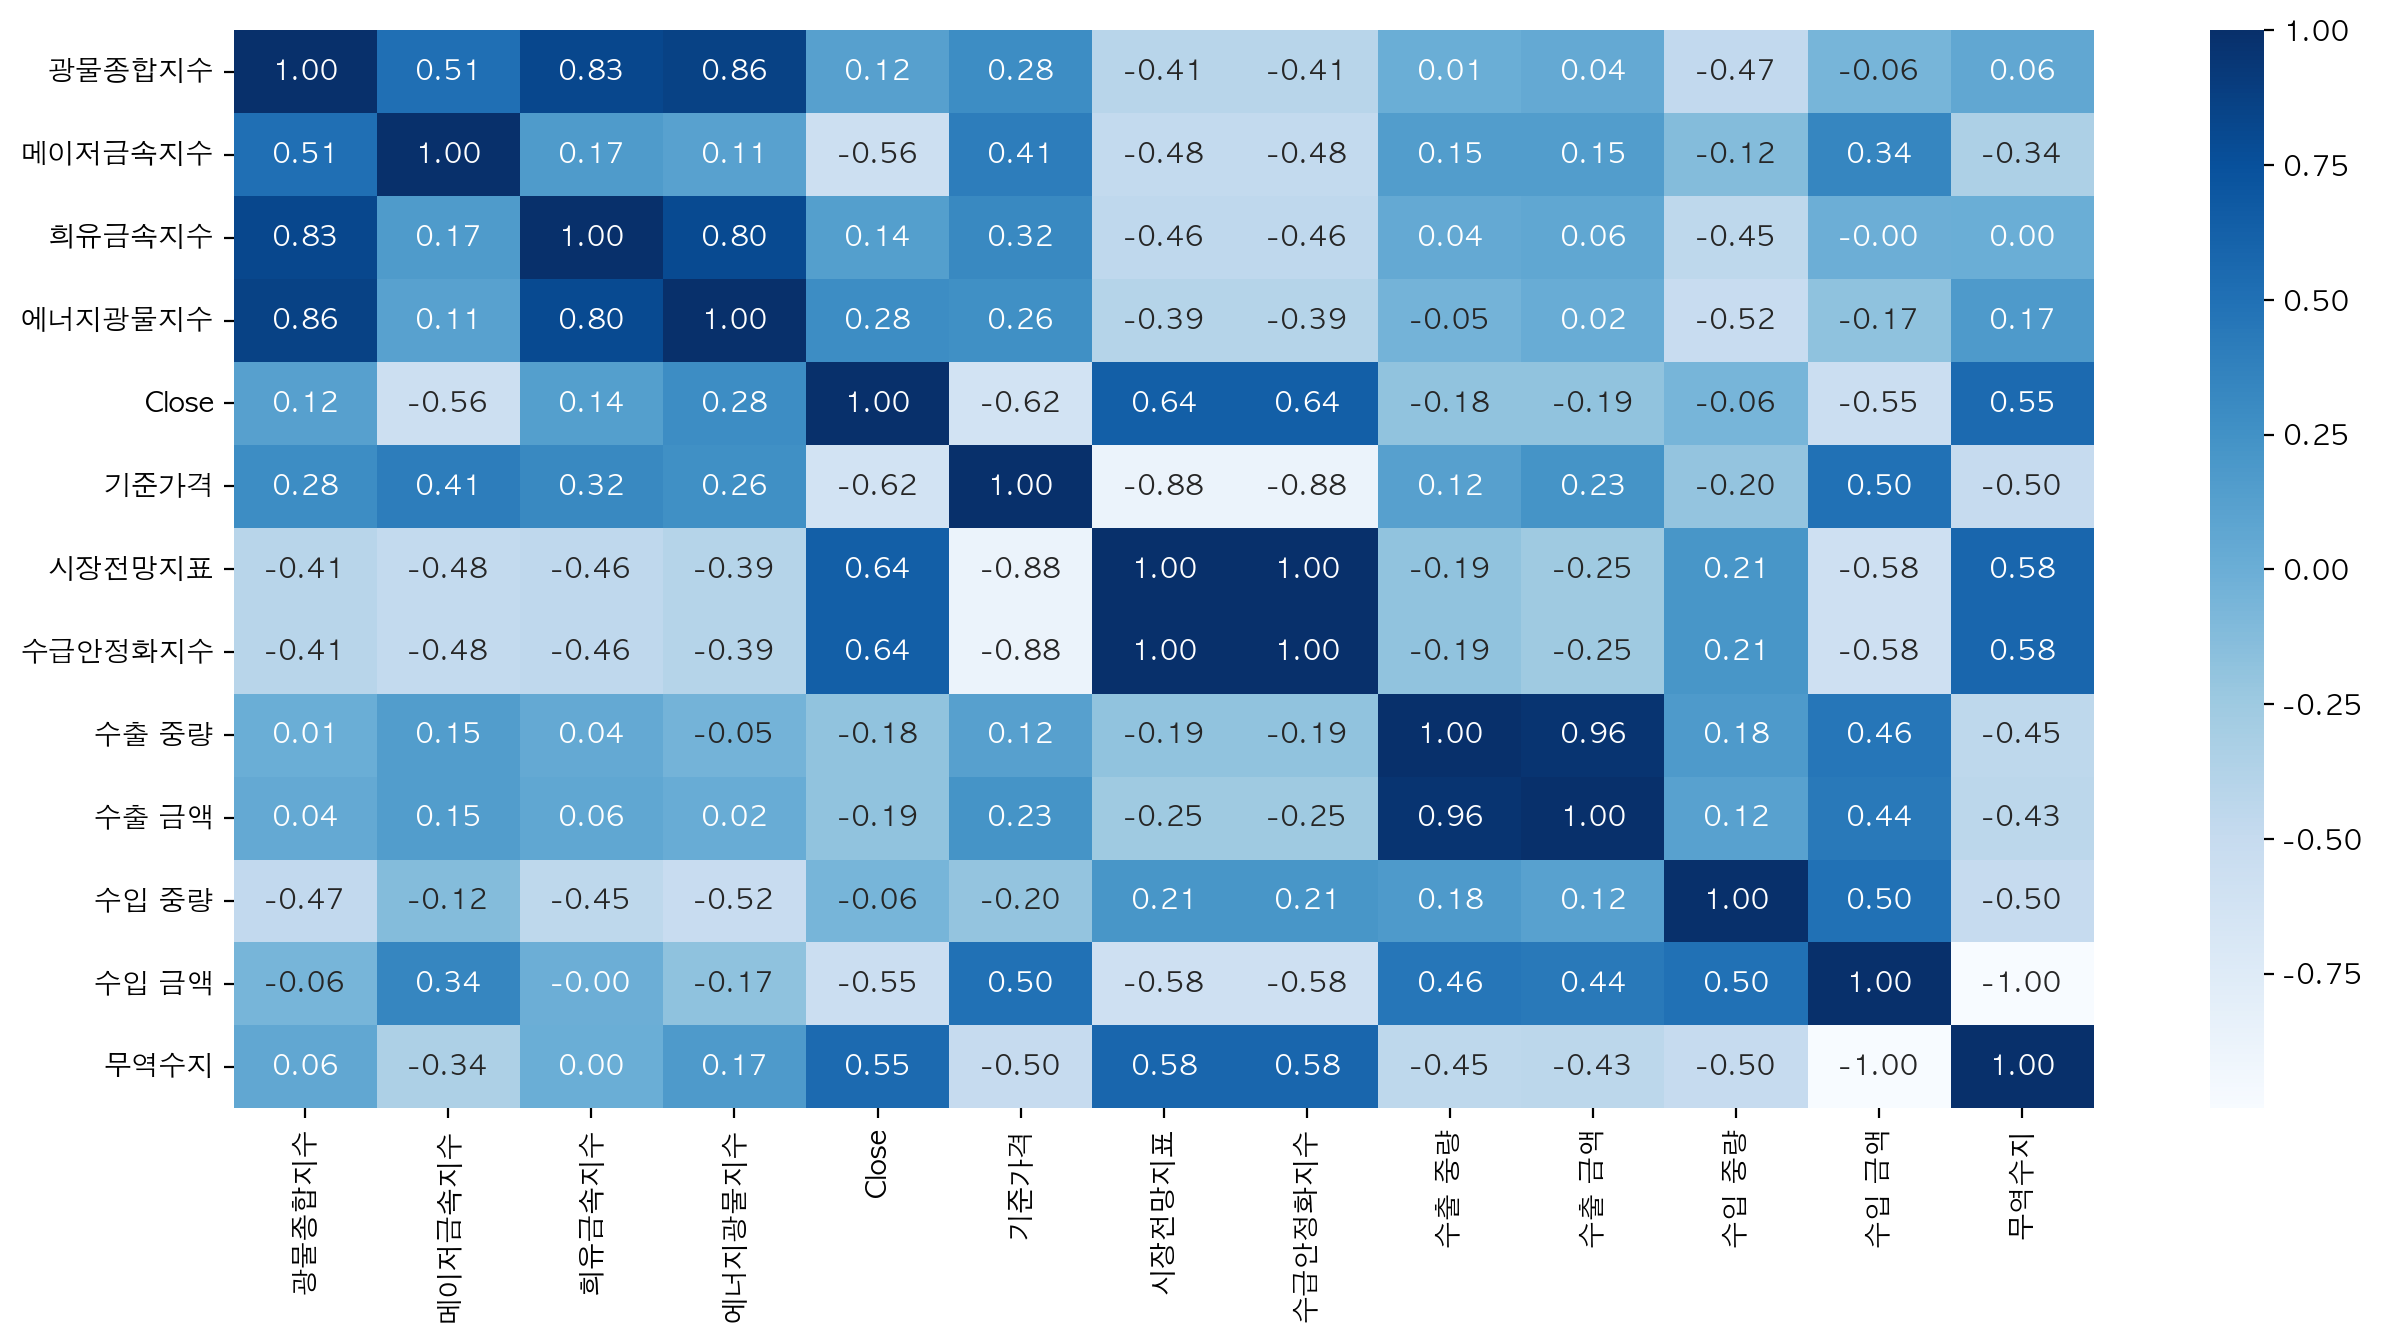

In [32]:
# 히트맵
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), cmap="Blues", annot=True, fmt=".2f")

- 기준가격이 환율인 Close와 -0.62라는 상관계수를 가짐
- 시장전망지표와 수급안정화지수는 서로 상관계수가 1임

### 망간 기준가격 plot

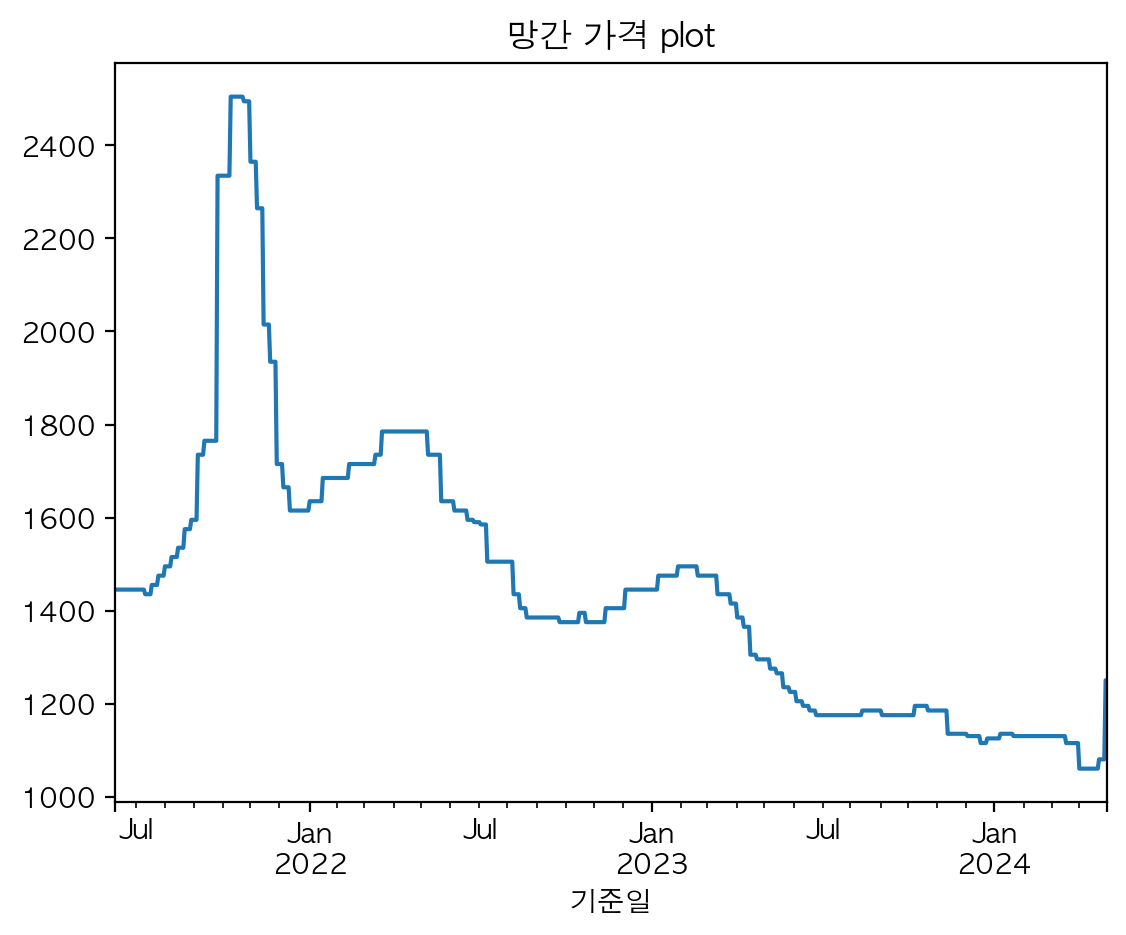

In [33]:
df['기준가격'].plot()
plt.title('망간 가격 plot')
plt.show()

In [34]:
# 기준가격이 최고점을 찍었을 때 일자 2021-10-11
df['기준가격'].idxmax()

Timestamp('2021-10-11 00:00:00')

- 망간 광물 가격은 2021년 10월 15일에 최고점을 찍은 후 급격히 하락 
- 그 후 상승과 하락을 반복하다 현재 급격히 상승하는 추세를 보임

### 망간 가격과 환율 간의 Plot

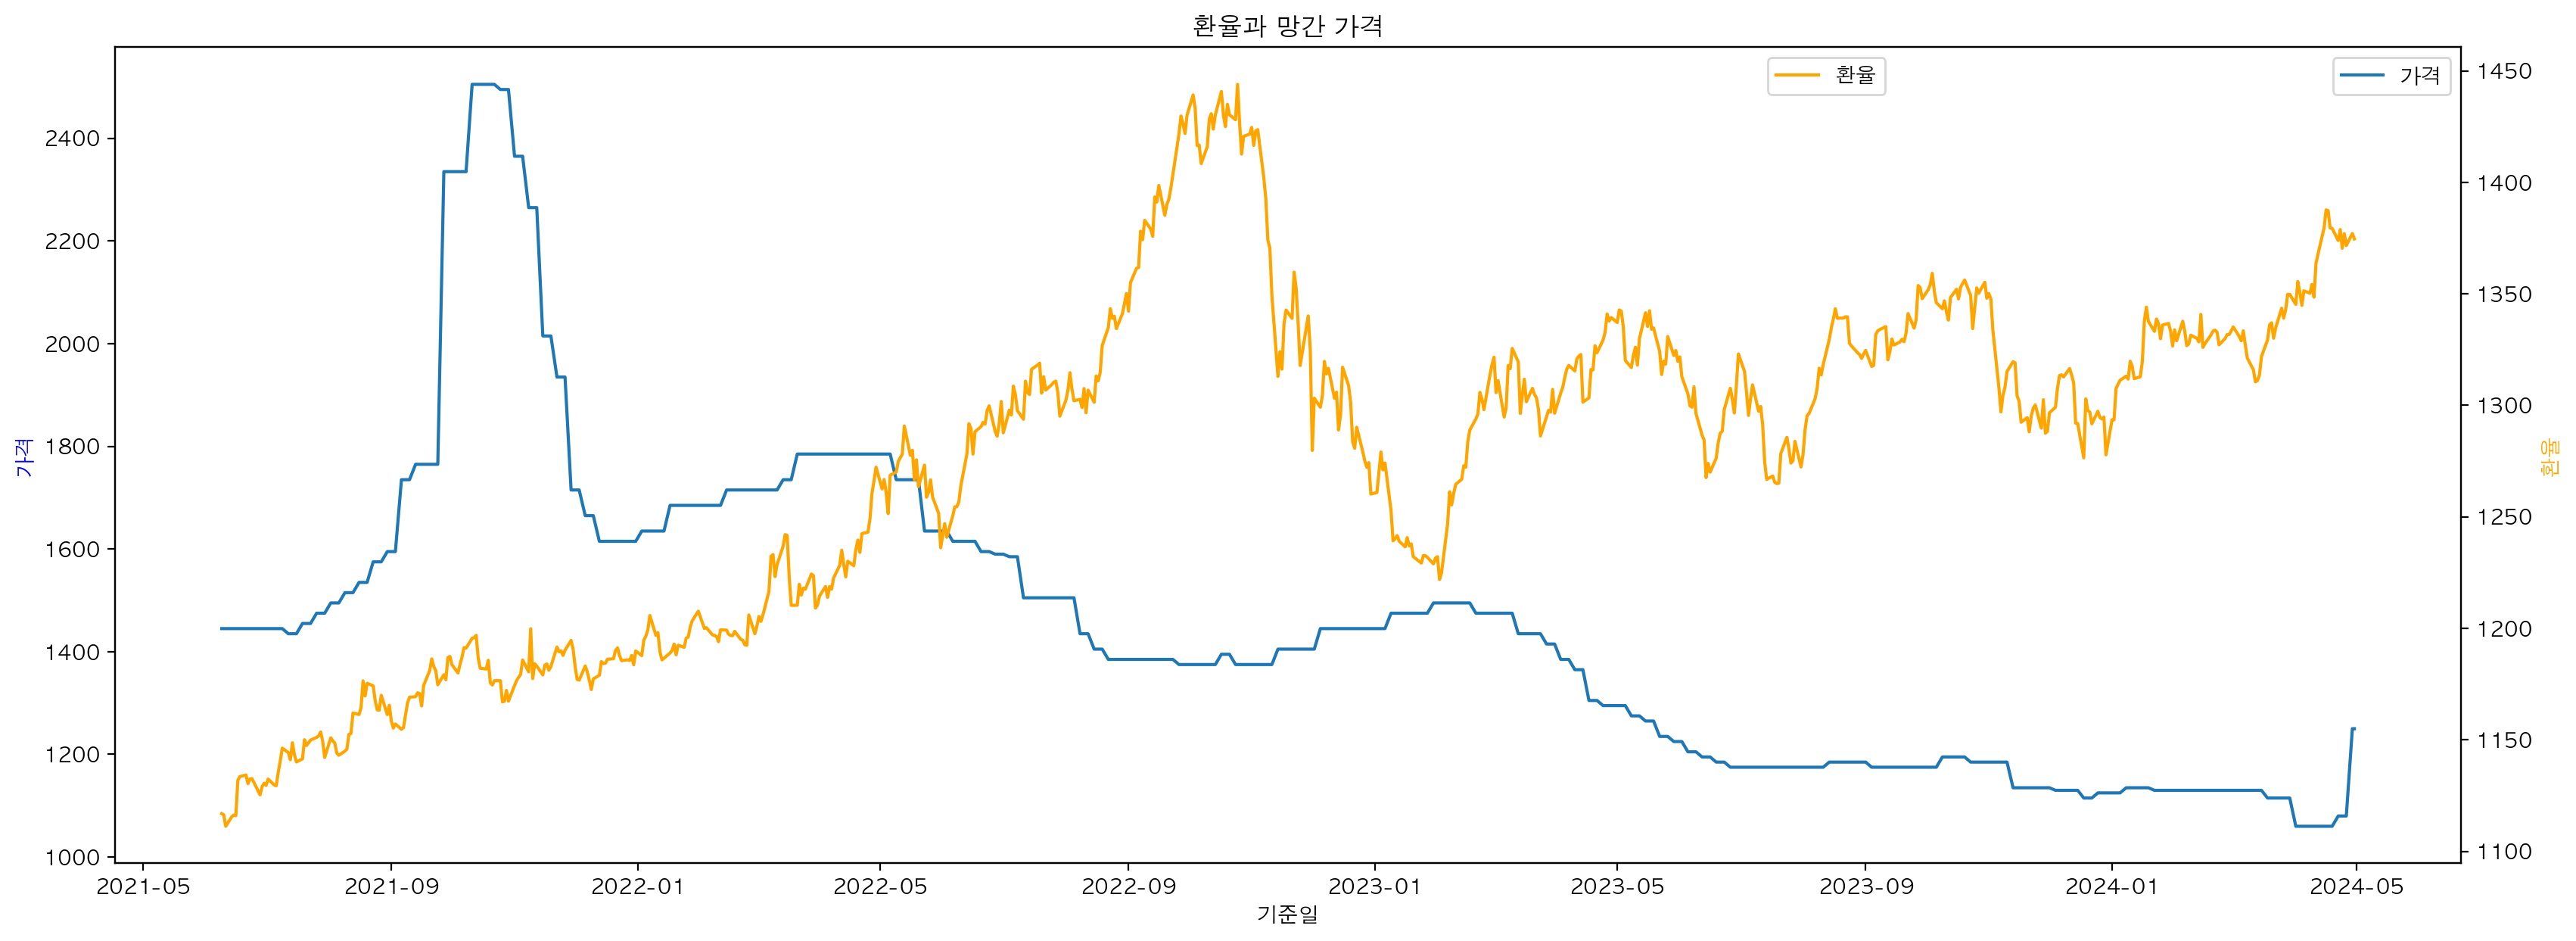

In [35]:
plt.figure(figsize=(20, 7))
# 기준가격에 대한 선 그래프 (왼쪽 y축 사용)
ax1 = sns.lineplot( x=df.index, y='기준가격', data=df, label='가격', ci = None)

# 오른쪽 y축 설정
ax2 = ax1.twinx()

# 환율에 대한 선 그래프 (오른쪽 y축 사용)
sns.lineplot(x=df.index, y='Close', data=df, color='orange', label='환율', ax=ax2, ci = None)

# 각 y축에 대한 레이블 설정
ax1.set_ylabel('가격', color='blue')
ax2.set_ylabel('환율', color='orange')
# 타이틀과 범례 설정
plt.title('환율과 망간 가격')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1.0))

# x축 레이블 설정
plt.xlabel('기준일')

# 그래프 표시
plt.show()

- 2022년 5월부터 망간 가격이 고점을 기록할 때 환율은 동시에 저점을 찍으며, 반대로 망간이 저점을 기록할 때 환율은 고점을 찍는 경향
- 이는 두 변수 간에 반대 방향으로 반응하는 패턴이 있는 듯함. 
- 망간 가격은 환율과 서로 영향을 미치는 것이 맞다고 판단

### 시장전망지표 vs 수급안정화지수

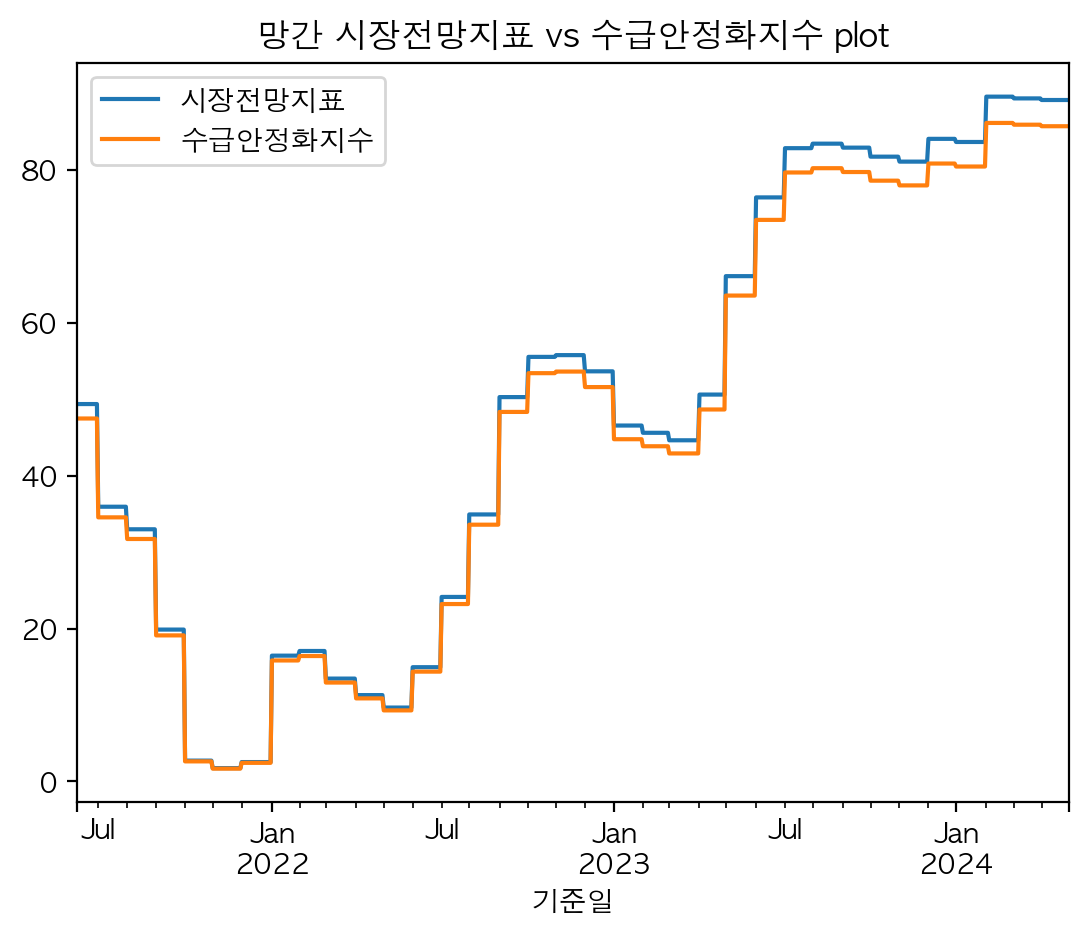

In [36]:
df[['시장전망지표','수급안정화지수']].plot()
plt.title('망간 시장전망지표 vs 수급안정화지수 plot')
plt.show()

- 두 변수 사이 상관계수는 1
- 추세도 똑같음. 한 변수는 삭제하여 모델링을 할 필요성 O
- 현재 망간의 수급현황은 좋아지고 있는 듯함

### 망간 가격과 희유금속지수 관계

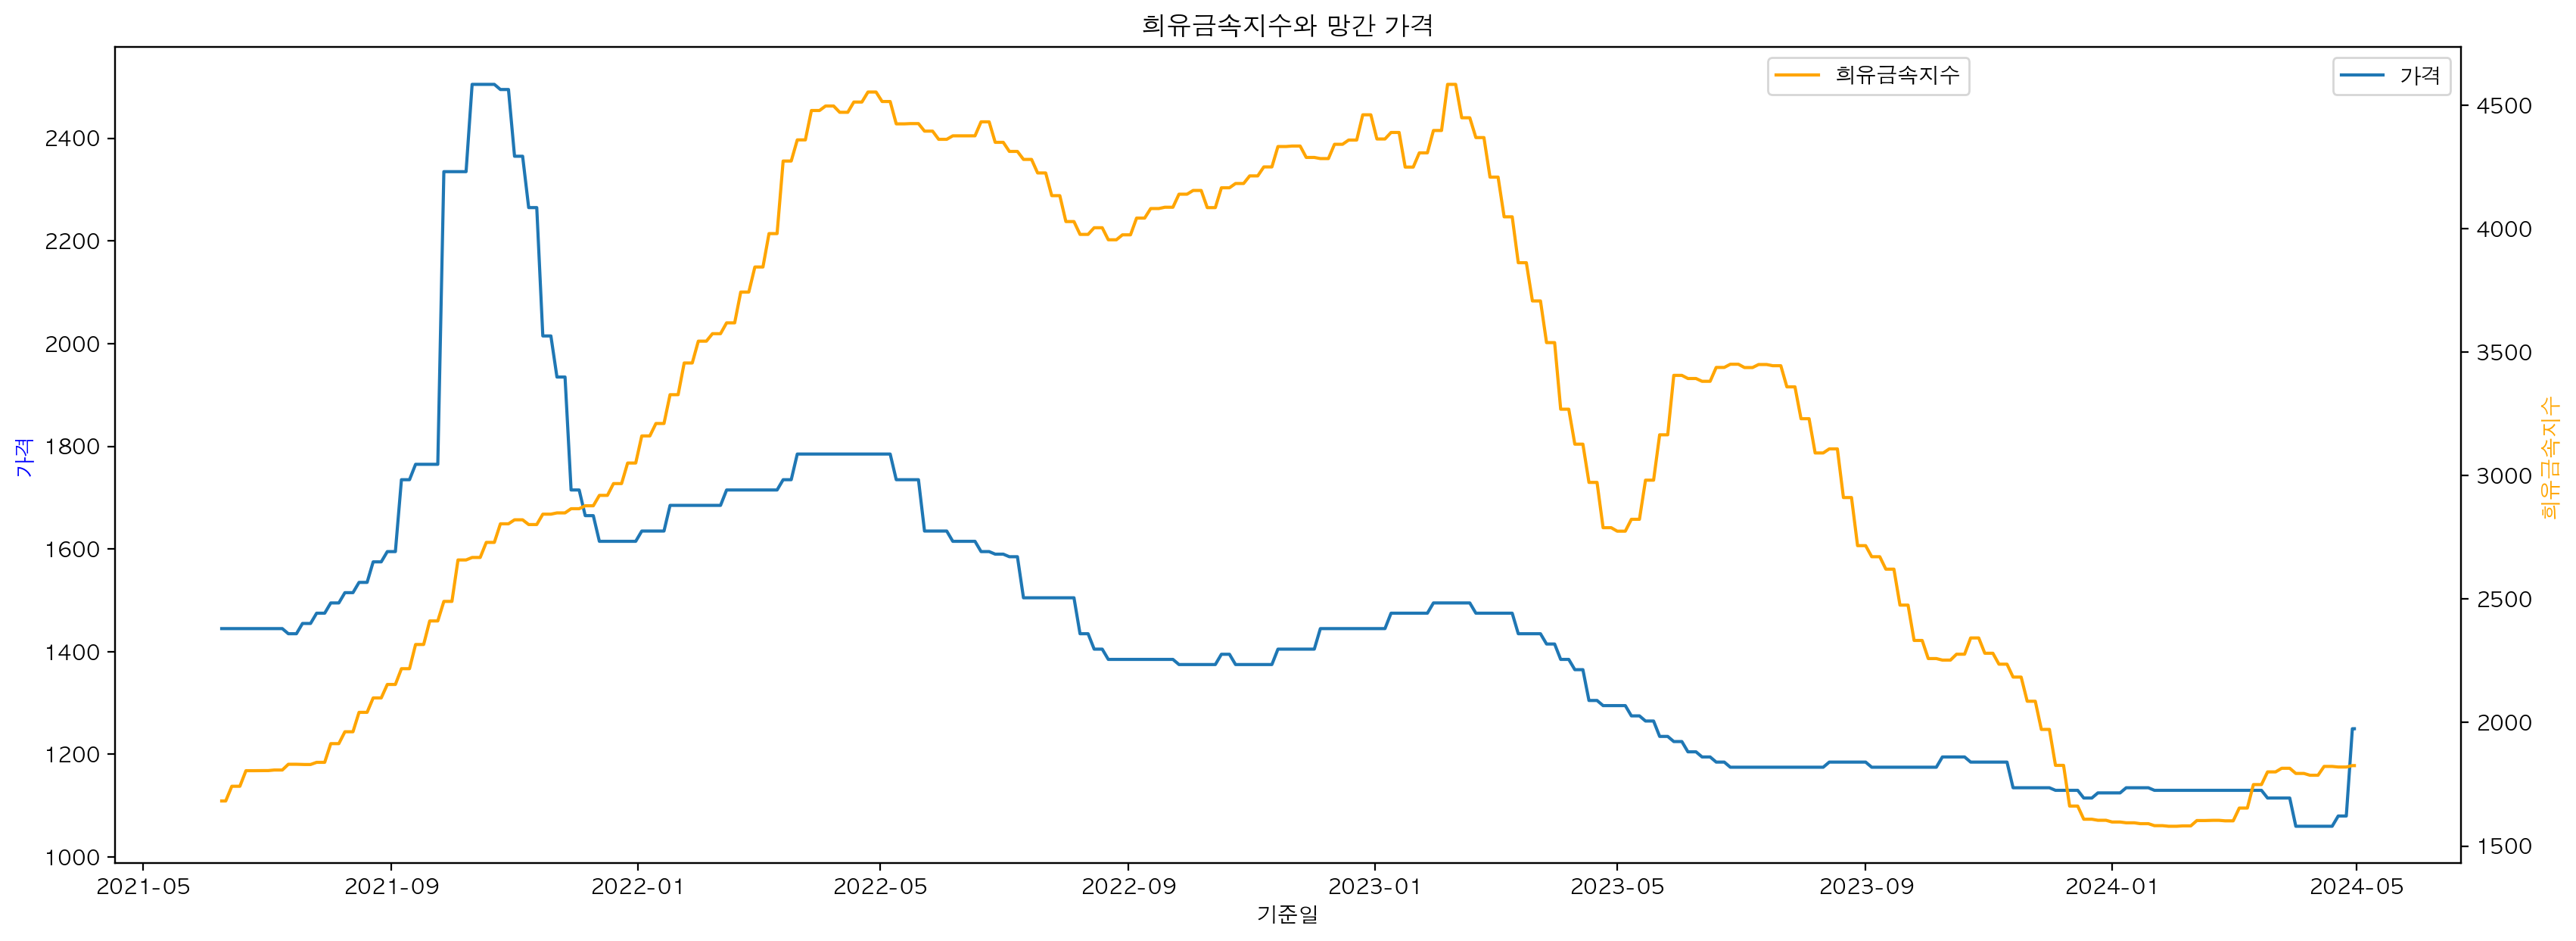

In [37]:
plt.figure(figsize=(20, 7))
# 가격 대한 선 그래프 (왼쪽 y축 사용)
ax1 = sns.lineplot( x=df.index, y='기준가격', data=df, label='가격', ci = None)

# 오른쪽 y축 설정
ax2 = ax1.twinx()

# 희유금속지수 대한 선 그래프 (오른쪽 y축 사용)
sns.lineplot(x=df.index, y='희유금속지수', data=df, color='orange', label='희유금속지수', ax=ax2, ci = None)

# 각 y축에 대한 레이블 설정
ax1.set_ylabel('가격', color='blue')
ax2.set_ylabel('희유금속지수', color='orange')
# 타이틀과 범례 설정
plt.title('희유금속지수와 망간 가격')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1.0))

# x축 레이블 설정
plt.xlabel('기준일')

# 그래프 표시
plt.show()

- 망간의 경우에는 가격 변수와 희유금속지수 사이 상관관계가 0.32
- 망간 가격 데이터가 희유금속지수에 유의미한 영향을 준다고는 보기 어렵다고 판단하였다.